# Informal benchmarking

Done on my laptop (a Dell XPS 13 9360 with ~8 GB of RAM).

Some notes:

- All of the sequences I "simulate" as test data here are generated randomly. Creating dot plots of similar sequences should give more realistic results.


- **For this notebook: the benchmarking here uses the "old" method** for computing the dot plot matrix (only using suffix arrays). It is slower than the current default method but more memory efficient -- for example, it can successfully generate the 100,000,000 x 100,000,000 dot plot matrices shown at the bottom of this notebook on my laptop (although this does take about 45 minutes per matrix).

  - (I did this benchmarking using an old version of the code, before I moved this method from being the default to being only available using the `suff_only` option. Specifically, I used the version of the code at [commit `7397b18`](https://github.com/fedarko/wotplot/tree/7397b184e8a6dbbc738e1e99f2e2fefd69c9b94f).)

**Additional dependencies**: the `memory_profiler` pip package, as described in [this document](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html).

In [2]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [3]:
import time
import random
import wotplot
from matplotlib import pyplot

# Set a random seed (so that we should get the *same* random sequences when rerunning this notebook,
# making the benchmarking process more consistent)
random.seed(333)

In [4]:
def genseq(n):
    # generates a random DNA sequence of length n
    s = ""
    for i in range(n):
        s += random.choice("ACGT")
    return s

In [5]:
def run(s1, s2, k, binary, markersize, ax, force_binary=False):
    print(f"binary = {binary}...", flush=True)
    t0 = time.time()
    m = wotplot.DotPlotMatrix(s1, s2, k, binary=binary, verbose=True)
    t1 = time.time()
    print(f"Matrix construction took {t1 - t0:,.2f} sec.", flush=True)
    wotplot.viz_spy(m, markersize=markersize, force_binary=force_binary, title=f"$k$ = {k:,}", verbose=True, ax=ax)
    t2 = time.time()
    print(f"Visualization took {t2 - t1:,.2f} sec.", flush=True)
    return m, (t2 - t0)

def sim(n, k, markersize=0.5, fig_size_inches=(10, 7), incl_fb=False):
    # Generate a grid of dot plot visualizations for two randomly-generated sequences of length n,
    # given a k-mer size k. If incl_fb = False, then the left plot will show a visualization of the
    # binary matrix and the right plot will show a visualization of the not-binary matrix.
    #
    # Set incl_fb = True to add a third dot plot (on the right side) showing a visualization of the
    # not-binary matrix created using force_binary=True. This is just another layer of paranoid
    # benchmarking to make sure that parameter works as expected.
    s1 = genseq(n)
    s2 = genseq(n)
    if incl_fb:
        fig, (axB, axN, axN2) = pyplot.subplots(1, 3)
    else:
        fig, (axB, axN) = pyplot.subplots(1, 2)
        
    mB, tB = run(s1, s2, k, True, markersize, axB)
    axB.set_title(f"{tB:,.2f} sec.", fontsize=18)
    mN, tN = run(s1, s2, k, False, markersize, axN)
    axN.set_title(f"{tN:,.2f} sec.", fontsize=18)
    
    if incl_fb:
        mN2, tN2 = run(s1, s2, k, False, markersize, axN2, force_binary=True)
        axN2.set_title(f"{tN2:,.2f} sec.", fontsize=18)
        tt = tB + tN + tN2
    else:
        tt = tB + tN
        
    print(f"Total time taken: {tt:,.2f} sec.", flush=True)
    sty = 0.86 if not incl_fb else 0.77
    fig.suptitle(f"$n$ = {n:,}; $k$ = {k:,}", fontsize=22, x=0.51, y=sty)
    fig.set_size_inches(fig_size_inches)
    
    if incl_fb:
        return (mB, mN, mN2)
    else:
        return (mB, mN)

# 100 x 100

binary = True...
0.01s: validating inputs...
0.01s: computing suffix array for s1...
0.02s: computing suffix array for s2...
0.02s: finding forward matches between s1 and s2...
0.04s: found 2,453 forward match cell(s).
0.04s: computing ReverseComplement(s2)...
0.04s: computing suffix array for ReverseComplement(s2)...
0.05s: finding matches between s1 and ReverseComplement(s2)...
0.09s: found 4,960 total match cell(s).
0.09s: density = 49.60%.
0.09s: converting match information to COO format inputs...
0.10s: creating sparse matrix from COO format inputs...
0.11s: done creating the matrix.
Matrix construction took 0.11 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.02s: Done.
Visualization took 0.02 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.02s: computing suffix array for s2...
0.03s: finding forward matches between s1 and s2...
0.05s: foun

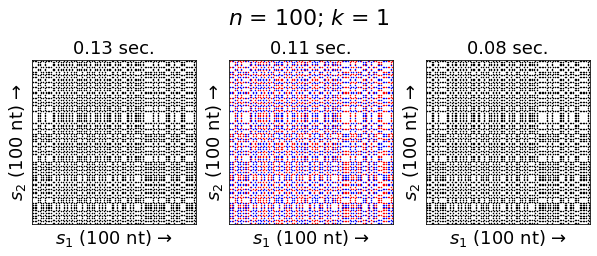

In [6]:
%memit sim(100, 1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: finding forward matches between s1 and s2...
0.01s: found 657 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding matches between s1 and ReverseComplement(s2)...
0.02s: found 1,125 total match cell(s).
0.02s: density = 11.48%.
0.02s: converting match information to COO format inputs...
0.03s: creating sparse matrix from COO format inputs...
0.03s: done creating the matrix.
Matrix construction took 0.03 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.02 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.02s: found 

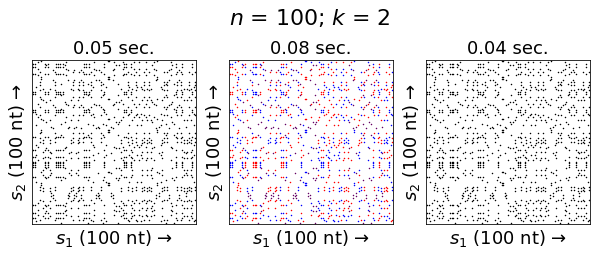

In [7]:
%memit sim(100, 2, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: finding forward matches between s1 and s2...
0.01s: found 145 forward match cell(s).
0.01s: computing ReverseComplement(s2)...
0.01s: computing suffix array for ReverseComplement(s2)...
0.01s: finding matches between s1 and ReverseComplement(s2)...
0.01s: found 267 total match cell(s).
0.01s: density = 2.78%.
0.01s: converting match information to COO format inputs...
0.01s: creating sparse matrix from COO format inputs...
0.01s: done creating the matrix.
Matrix construction took 0.01 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: finding forward matches between s1 and s2...
0.01s: found 145

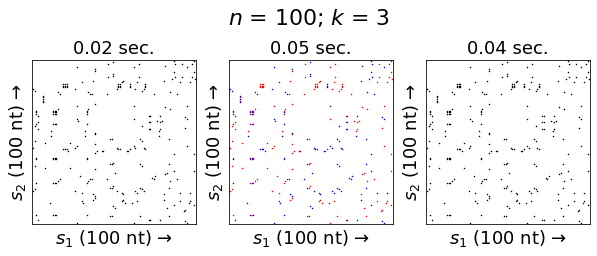

In [8]:
%memit sim(100, 3, incl_fb=True)

# 500 x 500

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.37s: found 62,526 forward match cell(s).
0.37s: computing ReverseComplement(s2)...
0.37s: computing suffix array for ReverseComplement(s2)...
0.37s: finding matches between s1 and ReverseComplement(s2)...
0.67s: found 124,904 total match cell(s).
0.67s: density = 49.96%.
0.67s: converting match information to COO format inputs...
0.73s: creating sparse matrix from COO format inputs...
0.78s: done creating the matrix.
Matrix construction took 0.79 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: finding forward matches between s1 and s2...
0.31s: f

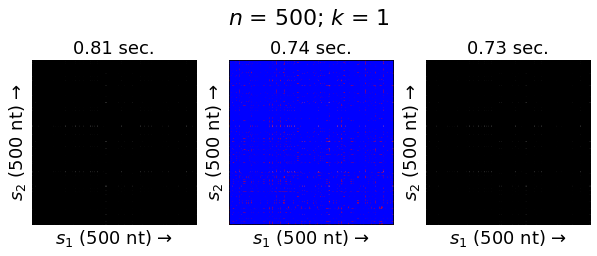

In [9]:
%memit sim(500, 1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: finding forward matches between s1 and s2...
0.10s: found 15,501 forward match cell(s).
0.10s: computing ReverseComplement(s2)...
0.10s: computing suffix array for ReverseComplement(s2)...
0.11s: finding matches between s1 and ReverseComplement(s2)...
0.19s: found 27,478 total match cell(s).
0.19s: density = 11.04%.
0.19s: converting match information to COO format inputs...
0.20s: creating sparse matrix from COO format inputs...
0.22s: done creating the matrix.
Matrix construction took 0.22 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.11s: fo

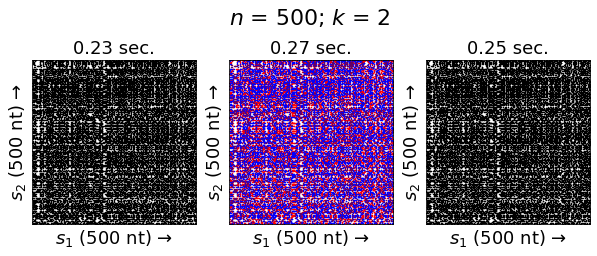

In [10]:
%memit sim(500, 2, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.02s: found 237 forward match cell(s).
0.02s: computing ReverseComplement(s2)...
0.02s: computing suffix array for ReverseComplement(s2)...
0.02s: finding matches between s1 and ReverseComplement(s2)...
0.03s: found 476 total match cell(s).
0.03s: density = 0.19%.
0.03s: converting match information to COO format inputs...
0.03s: creating sparse matrix from COO format inputs...
0.04s: done creating the matrix.
Matrix construction took 0.04 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.03s: found 237

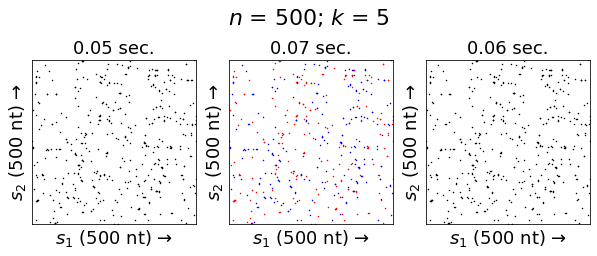

In [11]:
%memit sim(500, 5, incl_fb=True)

# 1,000 x 1,000

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.38s: found 62,688 forward match cell(s).
0.38s: computing ReverseComplement(s2)...
0.38s: computing suffix array for ReverseComplement(s2)...
0.38s: finding matches between s1 and ReverseComplement(s2)...
0.68s: found 109,544 total match cell(s).
0.68s: density = 10.98%.
0.68s: converting match information to COO format inputs...
0.76s: creating sparse matrix from COO format inputs...
0.81s: done creating the matrix.
Matrix construction took 0.82 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.33s: f

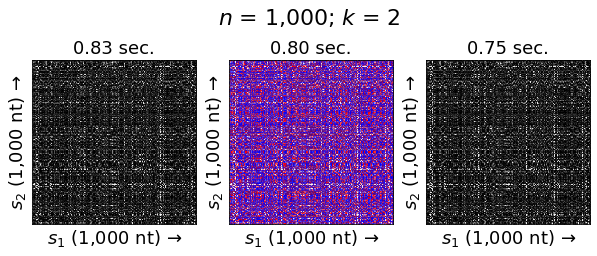

In [12]:
%memit sim(1000, 2, markersize=0.1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.02s: finding forward matches between s1 and s2...
0.13s: found 15,724 forward match cell(s).
0.13s: computing ReverseComplement(s2)...
0.13s: computing suffix array for ReverseComplement(s2)...
0.13s: finding matches between s1 and ReverseComplement(s2)...
0.23s: found 31,471 total match cell(s).
0.23s: density = 3.16%.
0.23s: converting match information to COO format inputs...
0.25s: creating sparse matrix from COO format inputs...
0.26s: done creating the matrix.
Matrix construction took 0.27 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.13s: fou

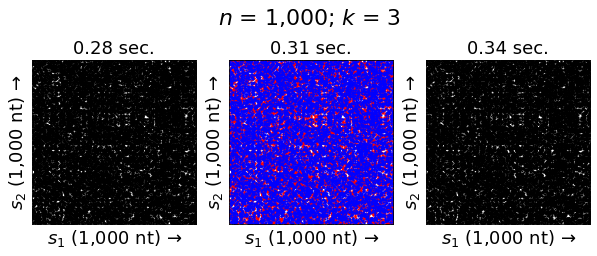

In [13]:
%memit sim(1000, 3, markersize=1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.04s: found 955 forward match cell(s).
0.04s: computing ReverseComplement(s2)...
0.04s: computing suffix array for ReverseComplement(s2)...
0.04s: finding matches between s1 and ReverseComplement(s2)...
0.07s: found 1,985 total match cell(s).
0.07s: density = 0.20%.
0.07s: converting match information to COO format inputs...
0.07s: creating sparse matrix from COO format inputs...
0.08s: done creating the matrix.
Matrix construction took 0.08 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.04s: found 9

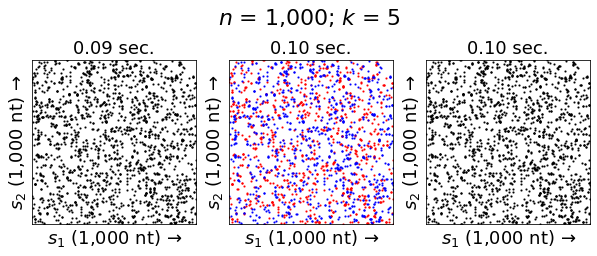

In [14]:
%memit sim(1000, 5, markersize=1, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.03s: found 1 forward match cell(s).
0.03s: computing ReverseComplement(s2)...
0.03s: computing suffix array for ReverseComplement(s2)...
0.03s: finding matches between s1 and ReverseComplement(s2)...
0.05s: found 1 total match cell(s).
0.06s: density = 0.00%.
0.06s: converting match information to COO format inputs...
0.06s: creating sparse matrix from COO format inputs...
0.06s: done creating the matrix.
Matrix construction took 0.06 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.03s: found 1 forwa

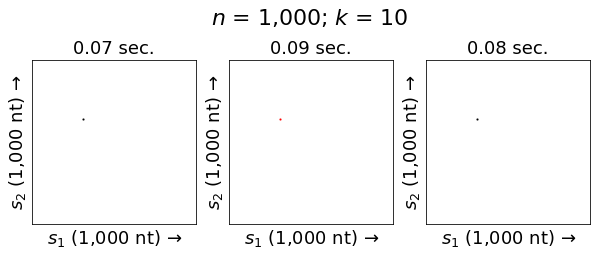

In [15]:
%memit sim(1000, 10, markersize=1, incl_fb=True)

# 10,000 x 10,000

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.51s: found 97,019 forward match cell(s).
0.51s: computing ReverseComplement(s2)...
0.51s: computing suffix array for ReverseComplement(s2)...
0.51s: finding matches between s1 and ReverseComplement(s2)...
0.96s: found 194,413 total match cell(s).
0.96s: density = 0.19%.
0.96s: converting match information to COO format inputs...
1.05s: creating sparse matrix from COO format inputs...
1.10s: done creating the matrix.
Matrix construction took 1.12 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: finding forward matches between s1 and s2...
0.52s: fo

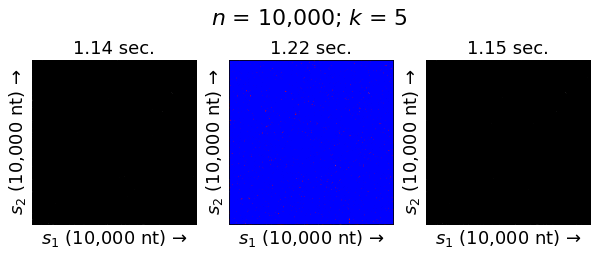

In [16]:
%memit sim(10000, 5, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.00s: finding forward matches between s1 and s2...
0.23s: found 108 forward match cell(s).
0.23s: computing ReverseComplement(s2)...
0.23s: computing suffix array for ReverseComplement(s2)...
0.23s: finding matches between s1 and ReverseComplement(s2)...
0.45s: found 197 total match cell(s).
0.45s: density = 0.00%.
0.45s: converting match information to COO format inputs...
0.45s: creating sparse matrix from COO format inputs...
0.45s: done creating the matrix.
Matrix construction took 0.45 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.00s: computing suffix array for s2...
0.02s: finding forward matches between s1 and s2...
0.23s: found 108

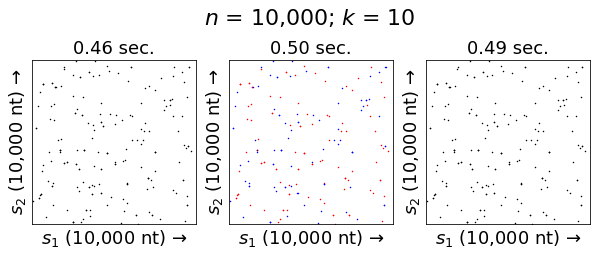

In [17]:
%memit sim(10000, 10, incl_fb=True)

binary = True...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.23s: found 0 forward match cell(s).
0.23s: computing ReverseComplement(s2)...
0.23s: computing suffix array for ReverseComplement(s2)...
0.23s: finding matches between s1 and ReverseComplement(s2)...
0.46s: found 0 total match cell(s).
0.46s: density = 0.00%.
0.46s: converting match information to COO format inputs...
0.46s: creating sparse matrix from COO format inputs...
0.46s: done creating the matrix.
Matrix construction took 0.46 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.00s: computing suffix array for s1...
0.01s: computing suffix array for s2...
0.01s: finding forward matches between s1 and s2...
0.24s: found 0 forwa

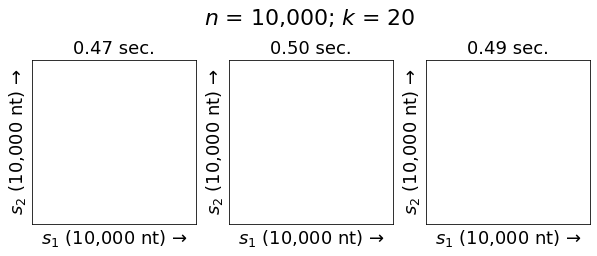

In [18]:
%memit sim(10000, 20, incl_fb=True)

# 100,000 x 100,000

i'm gonna stop including the `force_binary` test (`incl_fb`) here, since i think we've already shown by now that it works to speed up the visualization and the tests from here on are gonna start taking longer and longer

In [19]:
# %memit sim(100000, 5, markersize=0.01)

^^^ Note that this test sometimes crashes Jupyter (I got it to run once by closing most of the other tabs / processes I had running on my computer, then rerunning it). I think it's because $k = 5$ is an extremely small value of $k$ to use when we have sequences this big.

Since there are only $4^5 = 1,024$ possible $5$-mers, the number of random matches in a very large dot plot matrix will increase, causing the matrix to become relatively dense -- and thus require a lot of memory to store. If we need to store $100{,}000^2$ `int`s in memory, and one `int` takes up 1 byte (this is an underestimate -- apparently `int`s in python [generally take up 4 bytes](http://projectpython.net/chapter02/#integer-types)), then we need $10{,}000{,}000{,}000$ bytes of memory (aka 10 GB). This is just out of range for my laptop with 8 GB of RAM!

The other side of the coin is that -- since there are so few possible 5-mers, relatively speaking -- $k = 5$ dot plots are probably not going to be very useful for long sequences, anyway (as we saw above with the $k = 5$ dot plots of two 100,000 nt sequences). Let's try $k = 10$, instead?

binary = True...
0.00s: validating inputs...
0.01s: computing suffix array for s1...
0.02s: computing suffix array for s2...
0.03s: finding forward matches between s1 and s2...
1.68s: found 9,589 forward match cell(s).
1.68s: computing ReverseComplement(s2)...
1.68s: computing suffix array for ReverseComplement(s2)...
1.69s: finding matches between s1 and ReverseComplement(s2)...
3.33s: found 19,204 total match cell(s).
3.33s: density = 0.00%.
3.33s: converting match information to COO format inputs...
3.33s: creating sparse matrix from COO format inputs...
3.34s: done creating the matrix.
Matrix construction took 3.35 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.01s: computing suffix array for s1...
0.02s: computing suffix array for s2...
0.03s: finding forward matches between s1 and s2...
1.59s: foun

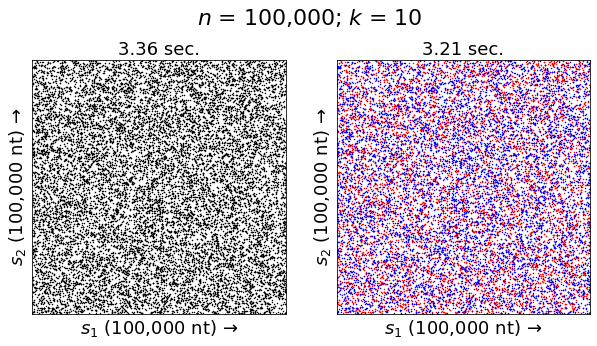

In [20]:
%memit sim(100000, 10)

Yep, this poor computer can handle that much easier.

binary = True...
0.00s: validating inputs...
0.01s: computing suffix array for s1...
0.02s: computing suffix array for s2...
0.03s: finding forward matches between s1 and s2...
1.60s: found 1 forward match cell(s).
1.60s: computing ReverseComplement(s2)...
1.60s: computing suffix array for ReverseComplement(s2)...
1.61s: finding matches between s1 and ReverseComplement(s2)...
3.20s: found 1 total match cell(s).
3.20s: density = 0.00%.
3.20s: converting match information to COO format inputs...
3.20s: creating sparse matrix from COO format inputs...
3.20s: done creating the matrix.
Matrix construction took 3.20 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.00s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.01s: computing suffix array for s1...
0.02s: computing suffix array for s2...
0.02s: finding forward matches between s1 and s2...
1.60s: found 1 forwa

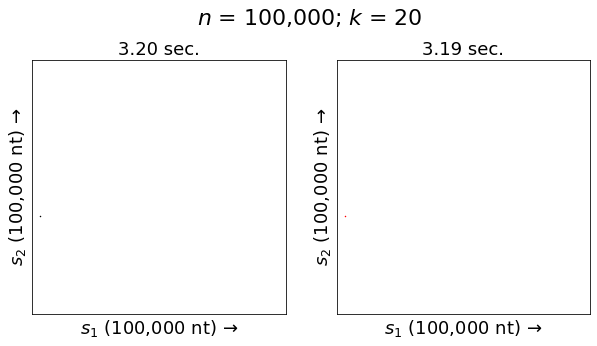

In [21]:
%memit sim(100000, 20)

# 1,000,000 x 1,000,000

binary = True...
0.00s: validating inputs...
0.10s: computing suffix array for s1...
0.16s: computing suffix array for s2...
0.22s: finding forward matches between s1 and s2...
16.08s: found 953,210 forward match cell(s).
16.08s: computing ReverseComplement(s2)...
16.09s: computing suffix array for ReverseComplement(s2)...
16.15s: finding matches between s1 and ReverseComplement(s2)...
30.93s: found 1,905,740 total match cell(s).
30.93s: density = 0.00%.
30.93s: converting match information to COO format inputs...
31.89s: creating sparse matrix from COO format inputs...
32.53s: done creating the matrix.
Matrix construction took 32.80 sec.
0.00s: Visualizing all match cells with spy()...
0.07s: Done visualizing all match cells.
0.07s: Slightly restyling the visualization...
0.07s: Done.
Visualization took 0.07 sec.
binary = False...
0.00s: validating inputs...
0.10s: computing suffix array for s1...
0.15s: computing suffix array for s2...
0.21s: finding forward matches between s1 and s2

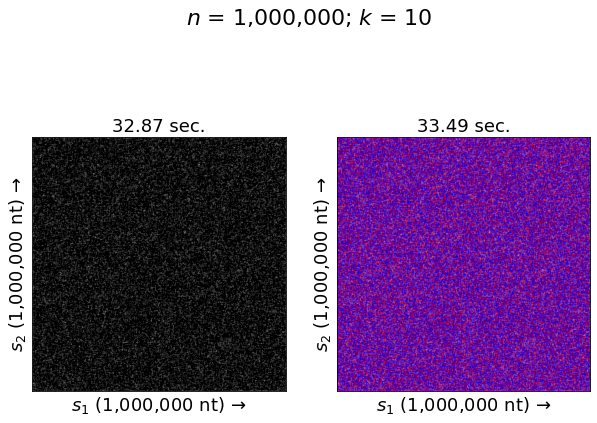

In [23]:
%memit sim(1000000, 10, markersize=0.005, fig_size_inches=(10, 10))

Yep, this is much easier for wotplot to handle. And using a larger _k_ means that the plots will probably be more informative, anyway :)

binary = True...
0.00s: validating inputs...
0.09s: computing suffix array for s1...
0.15s: computing suffix array for s2...
0.20s: finding forward matches between s1 and s2...
13.42s: found 1 forward match cell(s).
13.42s: computing ReverseComplement(s2)...
13.42s: computing suffix array for ReverseComplement(s2)...
13.48s: finding matches between s1 and ReverseComplement(s2)...
26.77s: found 3 total match cell(s).
26.77s: density = 0.00%.
26.77s: converting match information to COO format inputs...
26.77s: creating sparse matrix from COO format inputs...
26.78s: done creating the matrix.
Matrix construction took 26.78 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.00s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.10s: computing suffix array for s1...
0.15s: computing suffix array for s2...
0.21s: finding forward matches between s1 and s2...
13.92s: fo

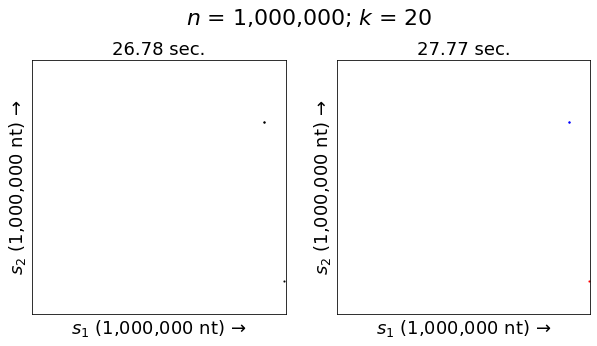

In [24]:
%memit sim(1000000, 20, markersize=1)

# 10,000,000 x 10,000,000

binary = True...
0.00s: validating inputs...
0.88s: computing suffix array for s1...
1.58s: computing suffix array for s2...
2.27s: finding forward matches between s1 and s2...
133.24s: found 0 forward match cell(s).
133.24s: computing ReverseComplement(s2)...
133.27s: computing suffix array for ReverseComplement(s2)...
134.07s: finding matches between s1 and ReverseComplement(s2)...
265.80s: found 0 total match cell(s).
265.81s: density = 0.00%.
265.81s: converting match information to COO format inputs...
265.81s: creating sparse matrix from COO format inputs...
265.81s: done creating the matrix.
Matrix construction took 265.81 sec.
0.00s: Visualizing all match cells with spy()...
0.00s: Done visualizing all match cells.
0.00s: Slightly restyling the visualization...
0.00s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
0.89s: computing suffix array for s1...
1.59s: computing suffix array for s2...
2.30s: finding forward matches between s1 and s2...


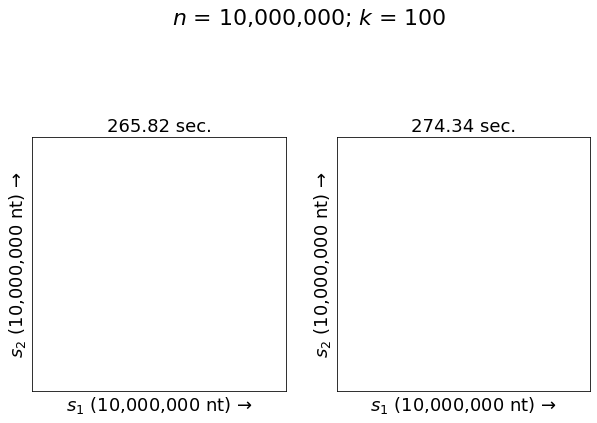

In [27]:
%memit sim(10000000, 100, markersize=3, fig_size_inches=(10, 10))

# 100,000,000 x 100,000,000

binary = True...
0.00s: validating inputs...
9.04s: computing suffix array for s1...
21.27s: computing suffix array for s2...
33.47s: finding forward matches between s1 and s2...
1,350.65s: found 8,941 forward match cell(s).
1,350.67s: computing ReverseComplement(s2)...
1,351.03s: computing suffix array for ReverseComplement(s2)...
1,363.34s: finding matches between s1 and ReverseComplement(s2)...
2,660.72s: found 18,243 total match cell(s).
2,660.76s: density = 0.00%.
2,660.76s: converting match information to COO format inputs...
2,660.77s: creating sparse matrix from COO format inputs...
2,660.78s: done creating the matrix.
Matrix construction took 2,660.79 sec.
0.00s: Visualizing all match cells with spy()...
0.01s: Done visualizing all match cells.
0.01s: Slightly restyling the visualization...
0.01s: Done.
Visualization took 0.01 sec.
binary = False...
0.00s: validating inputs...
8.52s: computing suffix array for s1...
20.92s: computing suffix array for s2...
33.16s: finding forw

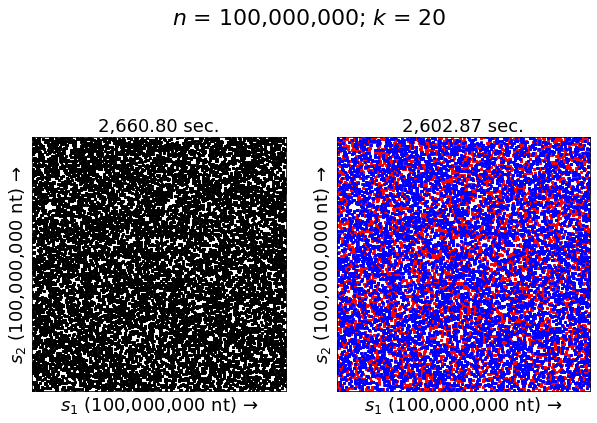

In [28]:
%memit sim(100000000, 20, markersize=2, fig_size_inches=(10, 10))

So we can actually create a dot plot of two 100 Mbp sequences (using a large enough $k$) -- it just takes ~50 minutes, at least on my laptop. (The left plot took ~44.3 minutes, and the right plot took ~43.4 minutes.)

I should probably note here that it's weird that constructing the binary matrix is apparently slower than constructing the not-binary matrix; although both matrices should have the same amounts of elements, the elements in the latter can be 0, 1, -1, or 2, while the elements in the former are only 0 or 1. You'd think that constructing the binary matrix might be faster, but -- both times I've run this benchmark -- it is actually noticeably slower than constructing the not-binary matrix. (Visualizing the not-binary matrix takes a few more seconds, but it's a much smaller effect.)

That all being said, this is not a very formal benchmark (I'm just ... running this on my laptop) so like who even knows.